In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\13_KNN\glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
correlation = df.iloc[:,:-1].corr()

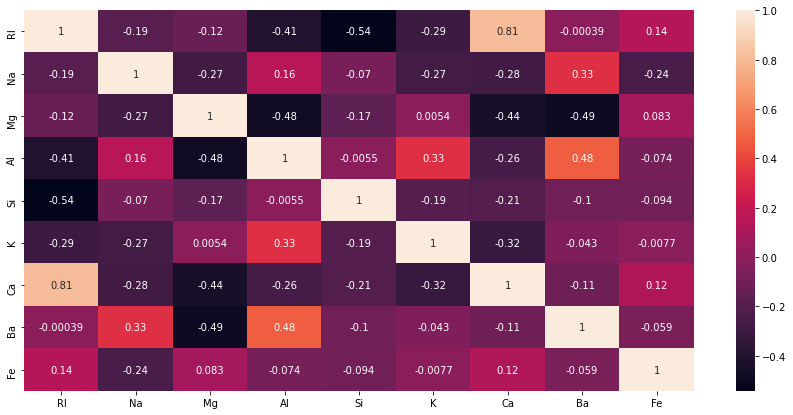

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation,annot=True)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df.iloc[:,:-1])
scale_values= scaler.transform(df.iloc[:,:-1])

In [23]:
scaledf= pd.DataFrame(scale_values,columns=df.iloc[:,:-1].columns)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledf,df['Type'],
                                                    test_size=0.30)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [34]:
print(confusion_matrix(y_test,pred))

[[18  1  4  0  0  0]
 [ 5 17  1  2  1  0]
 [ 2  2  0  0  0  0]
 [ 0  1  0  2  0  2]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  6]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.72      0.78      0.75        23
           2       0.81      0.65      0.72        26
           3       0.00      0.00      0.00         4
           5       0.50      0.40      0.44         5
           6       0.50      1.00      0.67         1
           7       0.75      1.00      0.86         6

    accuracy                           0.68        65
   macro avg       0.55      0.64      0.57        65
weighted avg       0.69      0.68      0.68        65



In [45]:
#choosing of K value
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaledf,df['Type'],cv=4)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

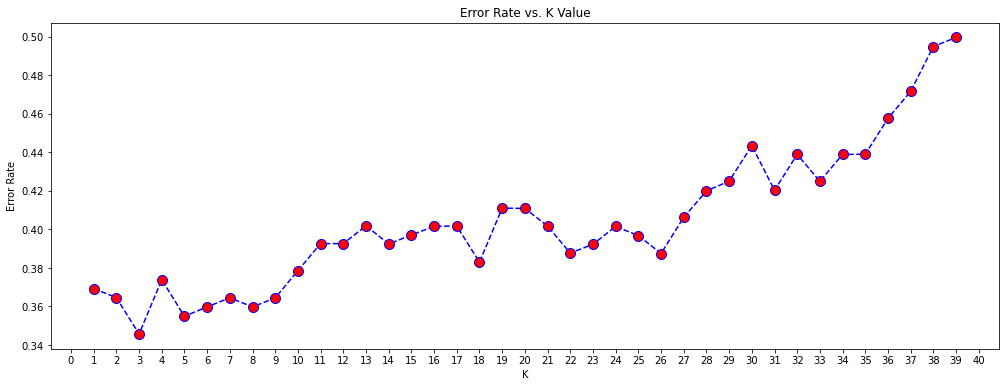

In [46]:
import numpy as np
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot()
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
ax.set_xticks(np.arange(41))
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
#Accuracy rate is highest at K=3

In [41]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[18  1  4  0  0  0]
 [ 5 17  1  2  1  0]
 [ 2  2  0  0  0  0]
 [ 0  1  0  2  0  2]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.72      0.78      0.75        23
           2       0.81      0.65      0.72        26
           3       0.00      0.00      0.00         4
           5       0.50      0.40      0.44         5
           6       0.50      1.00      0.67         1
           7       0.75      1.00      0.86         6

    accuracy                           0.68        65
   macro avg       0.55      0.64      0.57        65
weighted avg       0.69      0.68      0.68        65



In [49]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[17  3  3  0  0  0]
 [ 7 15  1  3  0  0]
 [ 2  2  0  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  5]]


              precision    recall  f1-score   support

           1       0.65      0.74      0.69        23
           2       0.62      0.58      0.60        26
           3       0.00      0.00      0.00         4
           5       0.40      0.40      0.40         5
           6       1.00      1.00      1.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.62        65
   macro avg       0.61      0.59      0.60        65
weighted avg       0.62      0.62      0.62        65



In [48]:
## as we are getting more accureacy with K=1 we will go with K=1